# GMM and EM
Gaussian Mixture Models and Expectation Maximization.

Try on coding sequence where there is only one population, presumably.

In [1]:
import numpy as np
from matplotlib import pyplot
from sklearn.mixture import GaussianMixture

In [2]:
try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/'  # must end in "/"
except:
    IN_COLAB = False
    DATA_DIR = 'D:/Adjeroh/Localization/TrainTest/'   # Windows
    DATA_DIR = '/Users/jasonmiller/WVU/Localization/TrainTest/'    # Mac
print(DATA_DIR)

/Users/jasonmiller/WVU/Localization/TrainTest/


In [3]:
GENES_FILE =    'CNRCI_coding_train_genes.csv'
RCI_FILE =      'CNRCI_coding_train_RCI.gc42.csv'

In [4]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080','HUVEC','MCF.7','NCI.H460','NHEK',\
     'SK.MEL.5','SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()

CELL_LINE = 0
print('Cell line for today',CELL_LINE,all_cell_lines[CELL_LINE])
EXCLUSIONS = [1,7]
for c in EXCLUSIONS:
    print('Exclude cell line',c,all_cell_lines[c])

Cell line for today 0 A549
Exclude cell line 1 H1.hESC
Exclude cell line 7 NCI.H460


In [5]:
class RCI_Loader():
    def __init__(self):
        self.cache=dict() 
        
    def load_gene_rci_values(self,filepath,cell_line):
        '''
        Load from RCI csv file.
        Return dict with keys=gene:str and values=RCI:float.
        '''
        gene_to_rci = {}
        overall_sum = 0
        with open (filepath,'r') as handle:
            header = None
            for row in handle:
                if header is None:
                    header = row # skip file's header line
                else:
                    line = row.strip()
                    fields = line.split(',')
                    gene_id = fields.pop(0)
                    rci_str = fields[cell_line]
                    if rci_str != "nan":
                        rci_val = float(rci_str)
                        gene_to_rci[gene_id] = rci_val
        return gene_to_rci

In [6]:
def plot(X,left=None,right=None,discrim=None,num_bins=100):
    pyplot.hist(X, bins=num_bins, density=True)
    if left is not None:
        pyplot.axvline(x=left,color='y')
    if right is not None:
        pyplot.axvline(x=right,color='y')
    if discrim is not None:
        pyplot.axvline(x=discrim,color='r')
    pyplot.show()
    
def show_gmm(model,X):
    print(model)
    print('AIC',model.aic(X),'BIC',model.bic(X),'score',model.score(X))
    for i in range(model.n_components):
        print('Gaussian',i,'mean=',model.means_[i],
            'wgt=',model.weights_[i], 'cov=',model.covariances_[i])

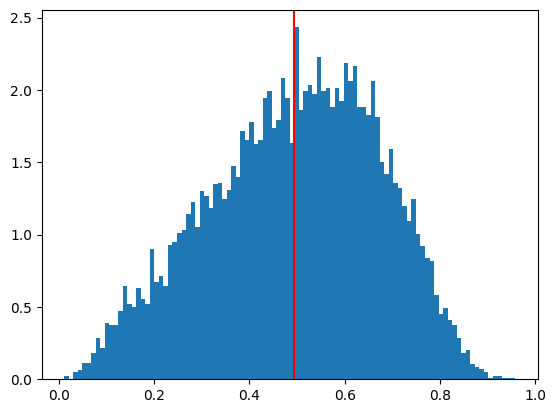

Cell Line 0 A549
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -6337.315660246768 BIC -6322.828496835256 score 0.3066993451463904
Gaussian 0 mean= [0.49428434] wgt= 1.0 cov= 0.03170616247683061
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -6796.06041989103 BIC -6759.84251136225 score 0.3291768436782274
Gaussian 0 mean= [0.61018817] wgt= 0.566372546914684 cov= 0.012580367480725744
Gaussian 1 mean= [0.34289921] wgt= 0.43362745308531603 cov= 0.01622330661031912
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -6858.367141381383 BIC -6800.418487735335 score 0.33248051564042286
Gaussian 0 mean= [0.26433012] wgt= 0.2450859890706401 cov= 0.009204226300318015
Gaussian 1 mean= [0.66461894] wgt= 0.3734435713173602 cov= 0.007653192117804491
Gaussian 2 mean= [0.4752742] wgt= 0.3814704396119997 cov= 0.006971730190409086


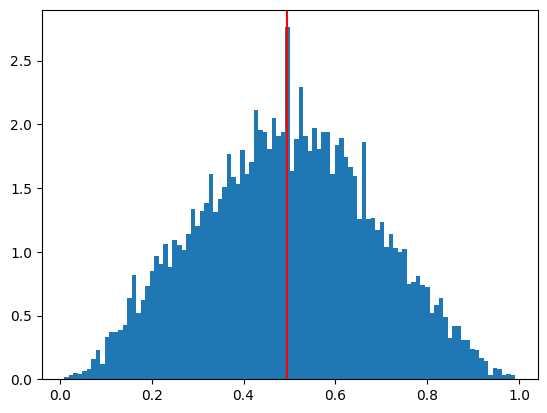

Cell Line 1 H1.hESC
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -6811.731955575418 BIC -6796.786546302531 score 0.2621435367529007
Gaussian 0 mean= [0.49449974] wgt= 1.0 cov= 0.0346611682526419
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -7002.997549755487 BIC -6965.634026573269 score 0.26973067499059566
Gaussian 0 mean= [0.62049545] wgt= 0.5247699948111177 cov= 0.01753563194089089
Gaussian 1 mean= [0.35536971] wgt= 0.47523000518888225 cov= 0.016684989967768266
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -7105.330806972223 BIC -7045.549169880674 score 0.2738973387297009
Gaussian 0 mean= [0.49599573] wgt= 0.4172304053515374 cov= 0.007589995616576749
Gaussian 1 mean= [0.7000778] wgt= 0.2954351298262078 cov= 0.01082427410594952
Gaussian 2 mean= [0.28095365] wgt= 0.2873344648222548 cov= 0.009420382977010434


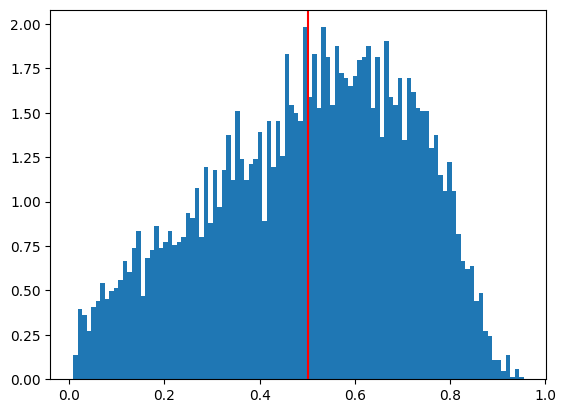

Cell Line 2 HeLa.S3
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -1981.7951400003744 BIC -1968.0926721946823 score 0.1421878232851478
Gaussian 0 mean= [0.50163662] wgt= 1.0 cov= 0.04405880694035488
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -2546.0403832983566 BIC -2511.784213784126 score 0.18301878729044513
Gaussian 0 mean= [0.30640422] wgt= 0.411435336230694 cov= 0.020618665735395086
Gaussian 1 mean= [0.63811356] wgt= 0.5885646637693059 cov= 0.015173927976592587
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -2679.3578650232885 BIC -2624.54799380052 score 0.19299426213828502
Gaussian 0 mean= [0.71200206] wgt= 0.3516561277971253 cov= 0.007457783596376582
Gaussian 1 mean= [0.23537688] wgt= 0.2723466043394701 cov= 0.012365010421549782
Gaussian 2 mean= [0.49774998] wgt= 0.37599726786340465 cov= 0.008492399668605264


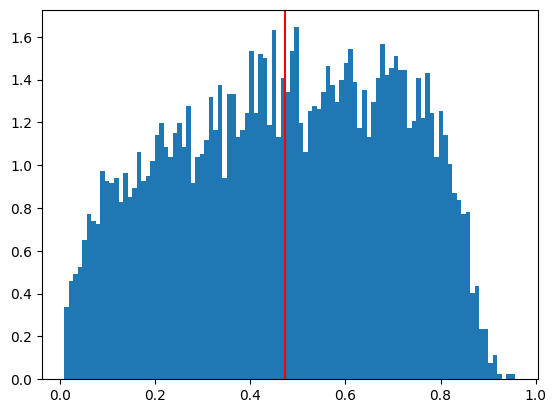

Cell Line 3 HepG2
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -949.8650412375507 BIC -935.563011425768 score 0.05060828953934374
Gaussian 0 mean= [0.47325453] wgt= 1.0 cov= 0.05291466554126306
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -1955.1004034120033 BIC -1919.3453288825465 score 0.10426042038476248
Gaussian 0 mean= [0.27882891] wgt= 0.47915922227039237 cov= 0.01990302996699571
Gaussian 1 mean= [0.65212077] wgt= 0.5208407777296075 cov= 0.016515152330947275
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -2345.212653333424 BIC -2288.004534086293 score 0.12527656267685824
Gaussian 0 mean= [0.4519873] wgt= 0.3550364297886503 cov= 0.00936115924313352
Gaussian 1 mean= [0.18774296] wgt= 0.28018996242432803 cov= 0.008766384158437375
Gaussian 2 mean= [0.71326125] wgt= 0.3647736077870218 cov= 0.008558558145217747


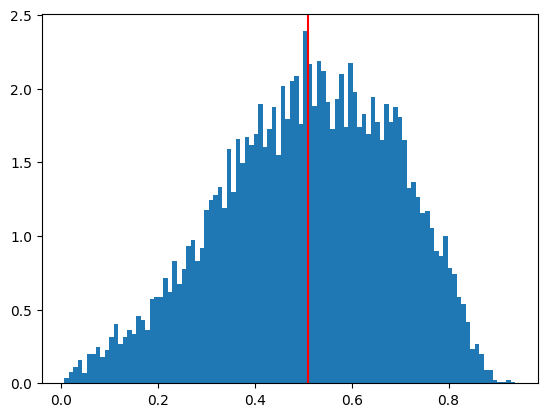

Cell Line 4 HT1080
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -5742.8322599175535 BIC -5728.498438289455 score 0.30009567936906284
Gaussian 0 mean= [0.50859964] wgt= 1.0 cov= 0.032127680507036155
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -6078.742378174478 BIC -6042.907824104234 score 0.31794999363835397
Gaussian 0 mean= [0.62936591] wgt= 0.5368124575860391 cov= 0.012729384266308734
Gaussian 1 mean= [0.36863724] wgt= 0.4631875424139608 cov= 0.018117178303607956
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -6173.892918634515 BIC -6116.557632122124 score 0.32323200619501385
Gaussian 0 mean= [0.4860187] wgt= 0.3951223857615208 cov= 0.0071827705739901096
Gaussian 1 mean= [0.68563167] wgt= 0.3603167700175497 cov= 0.007129580666628137
Gaussian 2 mean= [0.2842572] wgt= 0.24456084422092944 cov= 0.011932181940408305


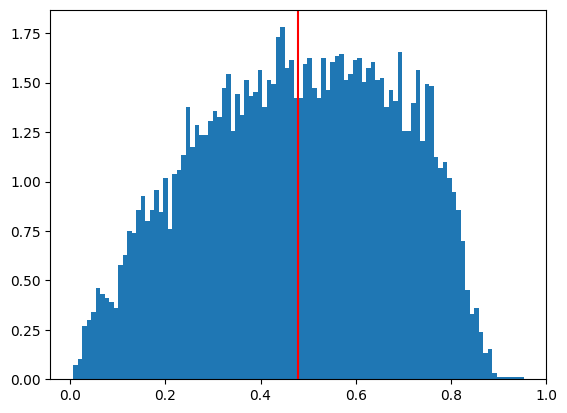

Cell Line 5 HUVEC
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -3315.657708661663 BIC -3301.1862773050484 score 0.1618240084167721
Gaussian 0 mean= [0.4780859] wgt= 1.0 cov= 0.04236208759541524
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -4114.875309311533 BIC -4078.696730919996 score 0.2010761094526437
Gaussian 0 mean= [0.31190088] wgt= 0.4901929126149502 cov= 0.017840005967889025
Gaussian 1 mean= [0.63787718] wgt= 0.50980708738505 cov= 0.013852545629541272
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -4333.467152743701 BIC -4275.581427317242 score 0.21202433229714834
Gaussian 0 mean= [0.47107301] wgt= 0.36048789654982116 cov= 0.008266312110876998
Gaussian 1 mean= [0.23677526] wgt= 0.2993312729103106 cov= 0.01021412337426404
Gaussian 2 mean= [0.69785104] wgt= 0.3401808305398683 cov= 0.007193592575902879


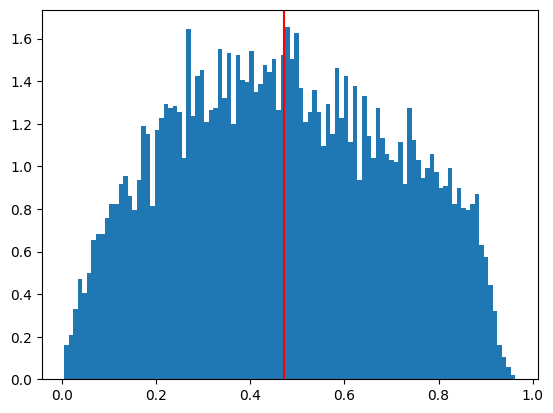

Cell Line 6 MCF.7
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -1065.9993075492469 BIC -1051.3771269990941 score 0.04837248225810339
Gaussian 0 mean= [0.47239624] wgt= 1.0 cov= 0.053151804861414964
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -1924.7461749720633 BIC -1888.1907235966817 score 0.08746592111085277
Gaussian 0 mean= [0.3020188] wgt= 0.5356135527443368 cov= 0.019792216823350736
Gaussian 1 mean= [0.66890598] wgt= 0.4643864472556633 cov= 0.01953114651415619
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -2262.7400723531446 BIC -2204.251350152534 score 0.10301718229444595
Gaussian 0 mean= [0.22126759] wgt= 0.3297911481564497 cov= 0.010283563026792368
Gaussian 1 mean= [0.47592532] wgt= 0.3729485324319748 cov= 0.010050046862249555
Gaussian 2 mean= [0.74657961] wgt= 0.29726031941157544 cov= 0.00962829329592049


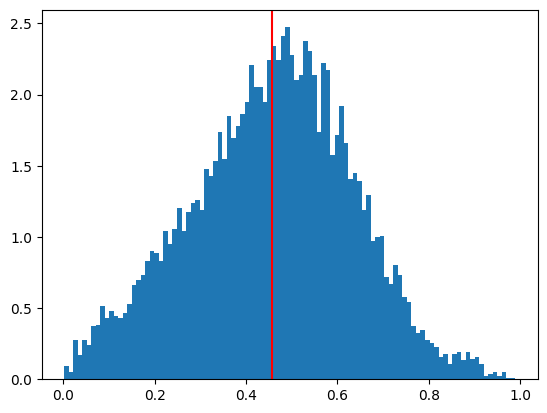

Cell Line 7 NCI.H460
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -5253.008382066204 BIC -5238.926669938236 score 0.31139725044818173
Gaussian 0 mean= [0.45681712] wgt= 1.0 cov= 0.031409661887718154
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -5306.3580105589235 BIC -5271.153730239005 score 0.31491280716496406
Gaussian 0 mean= [0.55587653] wgt= 0.5867088260887446 cov= 0.016882774969422004
Gaussian 1 mean= [0.31619222] wgt= 0.4132911739112553 cov= 0.018326471939717315
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -5338.399690782135 BIC -5282.072842270265 score 0.3171661942176362
Gaussian 0 mean= [0.63155352] wgt= 0.3110166087805127 cov= 0.012352260289881371
Gaussian 1 mean= [0.45786722] wgt= 0.43899923280839903 cov= 0.007910334734032352
Gaussian 2 mean= [0.23757554] wgt= 0.2499841584110883 cov= 0.010331143393735314


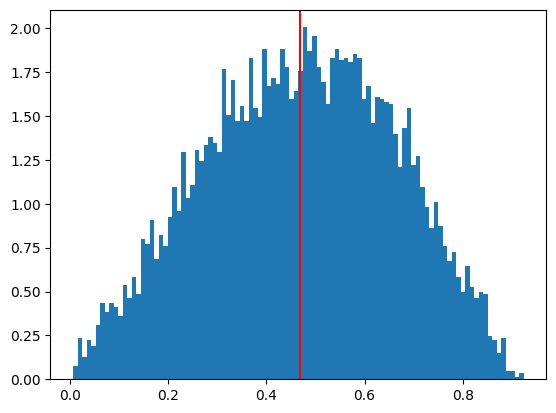

Cell Line 8 NHEK
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -4016.3092566967275 BIC -4002.158383477705 score 0.23004745117285005
Gaussian 0 mean= [0.46849975] wgt= 1.0 cov= 0.03695904350350221
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -4322.992875218553 BIC -4287.615692170996 score 0.2479396243544606
Gaussian 0 mean= [0.60656616] wgt= 0.5212048912489066 cov= 0.015396809080432087
Gaussian 1 mean= [0.31820396] wgt= 0.47879510875109343 cov= 0.017091551368804817
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -4363.4444433197195 BIC -4306.840950443629 score 0.25059764495992903
Gaussian 0 mean= [0.67623393] wgt= 0.3130699702209101 cov= 0.008905275739936018
Gaussian 1 mean= [0.25045109] wgt= 0.30011591367095375 cov= 0.010615423298466318
Gaussian 2 mean= [0.46954557] wgt= 0.3868141161081361 cov= 0.00828731465973234


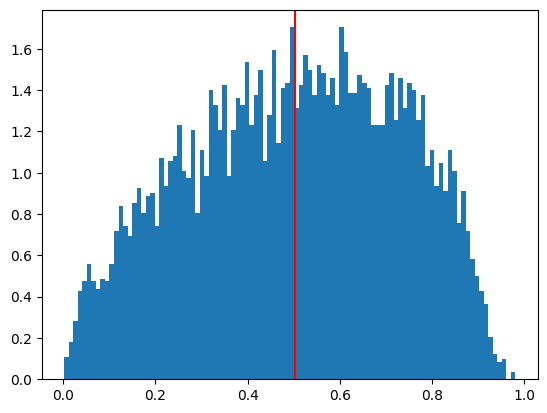

Cell Line 9 SK.MEL.5
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -1082.0317367393375 BIC -1067.958096797067 score 0.06459092046742819
Gaussian 0 mean= [0.50175193] wgt= 1.0 cov= 0.05145542021661234
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -1729.6031262400356 BIC -1694.419026384359 score 0.10346158714404875
Gaussian 0 mean= [0.30969516] wgt= 0.46613826352239385 cov= 0.020902849187570002
Gaussian 1 mean= [0.66944517] wgt= 0.5338617364776062 cov= 0.01780457528857174
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -1941.7640436710055 BIC -1885.4694839019232 score 0.11643654357505683
Gaussian 0 mean= [0.49996379] wgt= 0.3738549504213727 cov= 0.010033420653182771
Gaussian 1 mean= [0.23227136] wgt= 0.29707617633641376 cov= 0.011737676914246388
Gaussian 2 mean= [0.74706458] wgt= 0.32906887324221357 cov= 0.0086297644609222


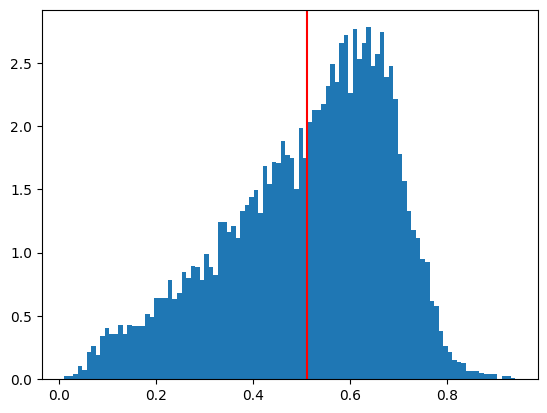

Cell Line 10 SK.N.DZ
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -6077.438736087771 BIC -6063.340741644636 score 0.35731132409446364
Gaussian 0 mean= [0.51147919] wgt= 1.0 cov= 0.02865392590498947
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -7102.849508606716 BIC -7067.604522498879 score 0.41791125197454265
Gaussian 0 mean= [0.34455453] wgt= 0.37546478185160914 cov= 0.017190717841152905
Gaussian 1 mean= [0.61183275] wgt= 0.624535218148391 cov= 0.008723179759365677
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -7184.083195846744 BIC -7127.691218074205 score 0.4230366155021589
Gaussian 0 mean= [0.46945722] wgt= 0.3308714849718229 cov= 0.006647026444060205
Gaussian 1 mean= [0.64531349] wgt= 0.47507555844098753 cov= 0.005638315399168119
Gaussian 2 mean= [0.25547932] wgt= 0.19405295658718955 cov= 0.010125617811798894


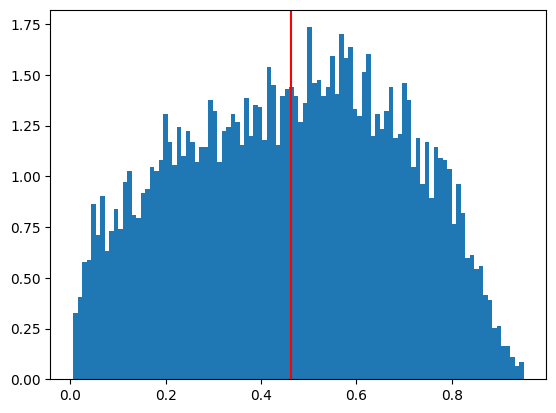

Cell Line 11 SK.N.SH
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -1235.1947452810923 BIC -1220.8372522803222 score 0.06394853675720365
Gaussian 0 mean= [0.46212905] wgt= 1.0 cov= 0.051521569663597694
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -2024.9579804491134 BIC -1989.0642479471883 score 0.1050138291077053
Gaussian 0 mean= [0.26464931] wgt= 0.4569040253241481 cov= 0.01856244129722058
Gaussian 1 mean= [0.6282678] wgt= 0.5430959746758519 cov= 0.018838802674112115
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -2243.640593209345 BIC -2186.210621206265 score 0.11660855574410903
Gaussian 0 mean= [0.19762833] wgt= 0.3098334784579433 cov= 0.010094215743466124
Gaussian 1 mean= [0.71100978] wgt= 0.31974717356255167 cov= 0.009761421096807636
Gaussian 2 mean= [0.46853331] wgt= 0.37041934797950504 cov= 0.010193477359259793


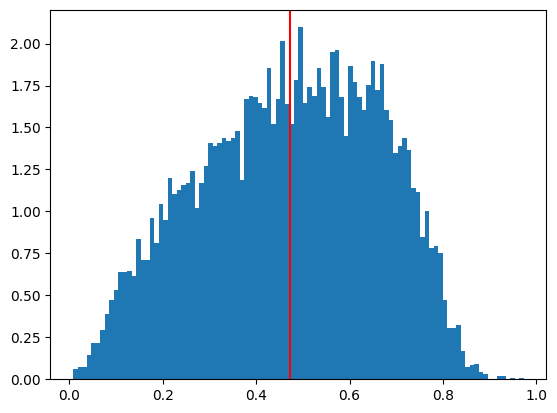

Cell Line 12 GM12878
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -4763.936397219976 BIC -4749.52956430617 score 0.24005318685026564
Gaussian 0 mean= [0.47245842] wgt= 1.0 cov= 0.03622680964810446
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -5430.385451093258 BIC -5394.368368808741 score 0.27390924635450903
Gaussian 0 mean= [0.31345638] wgt= 0.46567747997963377 cov= 0.016068219195309624
Gaussian 1 mean= [0.61103329] wgt= 0.5343225200203662 cov= 0.012558922318075786
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -5591.132314169896 BIC -5533.504982514669 score 0.2823045168749318
Gaussian 0 mean= [0.66443835] wgt= 0.36500537697614893 cov= 0.007142526358559192
Gaussian 1 mean= [0.23602429] wgt= 0.2719109787503708 cov= 0.008577233353077042
Gaussian 2 mean= [0.45652636] wgt= 0.3630836442734804 cov= 0.007002452149415249


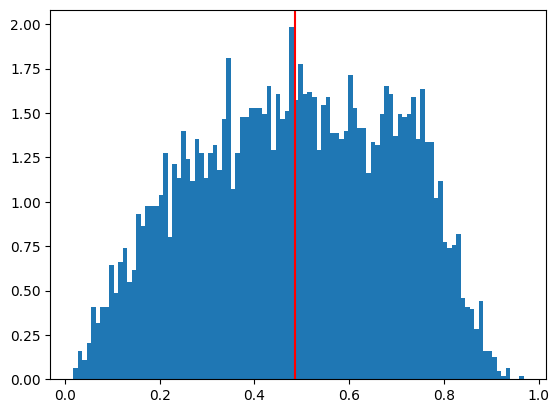

Cell Line 13 K562
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -2043.5200308790124 BIC -2029.907482309449 score 0.15334931327733767
Gaussian 0 mean= [0.48592608] wgt= 1.0 cov= 0.043086201511474104
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -2557.2290461760485 BIC -2523.19767475214 score 0.19227299626842784
Gaussian 0 mean= [0.31980482] wgt= 0.49502409093039434 cov= 0.017482734325414973
Gaussian 1 mean= [0.64877351] wgt= 0.5049759090696057 cov= 0.014613385808988492
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -2743.643925854207 BIC -2689.193731575953 score 0.2066839369273672
Gaussian 0 mean= [0.24320025] wgt= 0.3020111746642938 cov= 0.009361737609165281
Gaussian 1 mean= [0.47758575] wgt= 0.35923100702258515 cov= 0.007706799601778335
Gaussian 2 mean= [0.71116671] wgt= 0.33875781831312113 cov= 0.007337948192182558


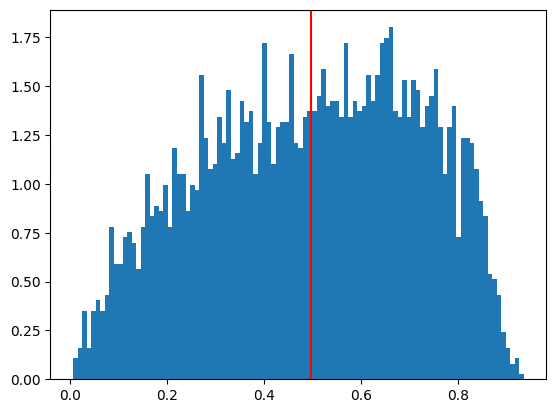

Cell Line 14 IMR.90
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -736.5011165376701 BIC -723.9125173199557 score 0.092539504691036
Gaussian 0 mean= [0.49790346] wgt= 1.0 cov= 0.04865817126349567
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -1135.1024782475026 BIC -1103.6309802032165 score 0.14310203427236973
Gaussian 0 mean= [0.30737252] wgt= 0.46639661673039756 cov= 0.018920577959390686
Gaussian 1 mean= [0.66443724] wgt= 0.5336033832696024 cov= 0.015187009225498564
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -1220.8068315198457 BIC -1170.4524346489877 score 0.15456221338663406
Gaussian 0 mean= [0.48588277] wgt= 0.345678614584104 cov= 0.009597896818696853
Gaussian 1 mean= [0.23284068] wgt= 0.29362301581626876 cov= 0.010628082247256627
Gaussian 2 mean= [0.7251954] wgt= 0.3606983695996273 cov= 0.008056799479942504


In [9]:
filename = DATA_DIR + RCI_FILE
loader = RCI_Loader()

for CELL_LINE in range(15):
    gene_to_rci = loader.load_gene_rci_values(filename,CELL_LINE)
    logs = list(gene_to_rci.values())
    antilogs = np.power(2,logs)
    cyto_pct = [x/(1+x) for x in antilogs]
    values = np.array(cyto_pct)
    values = values.reshape(-1, 1)

    model_1 = GaussianMixture(n_components=1, verbose=0, covariance_type='spherical', n_init=10) 
    model_1.fit(values)
    model_2 = GaussianMixture(n_components=2, verbose=0, covariance_type='spherical', n_init=10) 
    model_2.fit(values)
    model_3 = GaussianMixture(n_components=3, verbose=0, covariance_type='spherical', n_init=10) 
    model_3.fit(values)
    
    discrim =  model_1.means_[0]
    plot(cyto_pct,discrim=discrim)
    
    print('Cell Line',CELL_LINE,all_cell_lines[CELL_LINE])
    show_gmm(model_1,values)
    show_gmm(model_2,values)
    show_gmm(model_3,values)